# Image Deep Auto-Encoder

In [ ]:
import matplotlib.pyplot as plt

from autoencoder import ImgAutoEncoder
from keras._tf_keras.keras.datasets import mnist, cifar10

In [4]:

def show_decoded_mnist_imgs(original_test, encoded_imgs, decoded_imgs, n_layers, n=10):

  size = original_test.shape[1]

  plot_imgs = [
     (original_test, (size, size)),             # display original
     (encoded_imgs, (8, 4)),                    # display encoded imgs
     (decoded_imgs, (size, size))               # display decoded reconstruction
     ]
  n_plots = len(plot_imgs)
  plt.figure(figsize=(20, 2*n_plots))

  for i in range(n):
    for idx, (img, newshape) in enumerate(plot_imgs):
      ax = plt.subplot(n_plots, n, i + 1 + idx*n)
      plt.imshow(img[i].reshape(newshape))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  print(f"Deep Encoder, {n_layers} Layers\n")
  plt.show()

def show_decoded_cifar10_imgs(x_test, original_test, encoded_imgs, decoded_imgs, n_layers, n=10):

    size = original_test.shape[1]

    plot_imgs = [
        (original_test, ()),              # display original rgb
     (x_test, (size, size)),            # display grayscale
     (encoded_imgs, (8, 8)),            # display noisy encoded images
     (decoded_imgs, (size, size))       # display reconstruction
     ]
    
    n_plots = len(plot_imgs)
    plt.figure(figsize=(20, 2*n_plots))

    for i in range(n):
        for idx, (img, newshape) in enumerate(plot_imgs):
          ax = plt.subplot(n_plots, n, i + 1 + idx*n)
          if newshape:
            plt.imshow(img[i].reshape(newshape), cmap=plt.cm.gray)
          else:
            plt.imshow(original_test[i,:])
          plt.gray()
          ax.get_xaxis().set_visible(False)
          ax.get_yaxis().set_visible(False)

    # best performance from 2 layers; least overfitting
    print(f"Deep Encoder, {n_layers} Layers\n")
    plt.show()

def test_autoencoder(encoding_dim, dataset_type, n_layers=(1), n=10):

    TEST_MAP = {
            "cifar10": (cifar10, show_decoded_cifar10_imgs),
            "mnist": (mnist, show_decoded_mnist_imgs)
    }
    if dataset_type not in TEST_MAP:
        raise ValueError("invalid test dataset type")
    
    data, graphing_func = TEST_MAP[dataset_type]
    (x_train, _), (x_test, _) = data.load_data()
    params = {
        "original_test": x_test,
        "encoded_imgs": None, 
        "decoded_imgs": None, 
        "n_layers": None,
        "n": n
    }
    model = ImgAutoEncoder(encoding_dim)
    x_train, x_test = model.prep_data(x_train, x_test)
    if dataset_type == "cifar10":
            params["x_test"] = x_test

    for layer in n_layers:
        model._build(n_layers=layer)
        encoded_imgs, decoded_imgs = model._fit(x_test, x_train)
        params.update({
            "encoded_imgs": encoded_imgs, 
            "decoded_imgs": decoded_imgs, 
            "n_layers": layer    
        })
        graphing_func(**params)


## MNIST Handwriting Dataset

Train data shape: (60000, 784)
Test data shape: (10000, 784)

Compression factor: 24.5


Model: "AutoEncoder_1Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3822 - val_loss: 0.1925
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1814 - val_loss: 0.1530
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1488 - val_loss: 0.1338
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1315 - val_loss: 0.1220
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1207 - val_loss: 0.1132
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1127 - val_loss: 0.1069
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1073 - val_loss: 0.1024
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1026 - val_loss: 0.0991
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0996 - val_loss: 0.0969
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0978 - val_loss: 0.0954
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0964 - val_loss: 0.0944
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

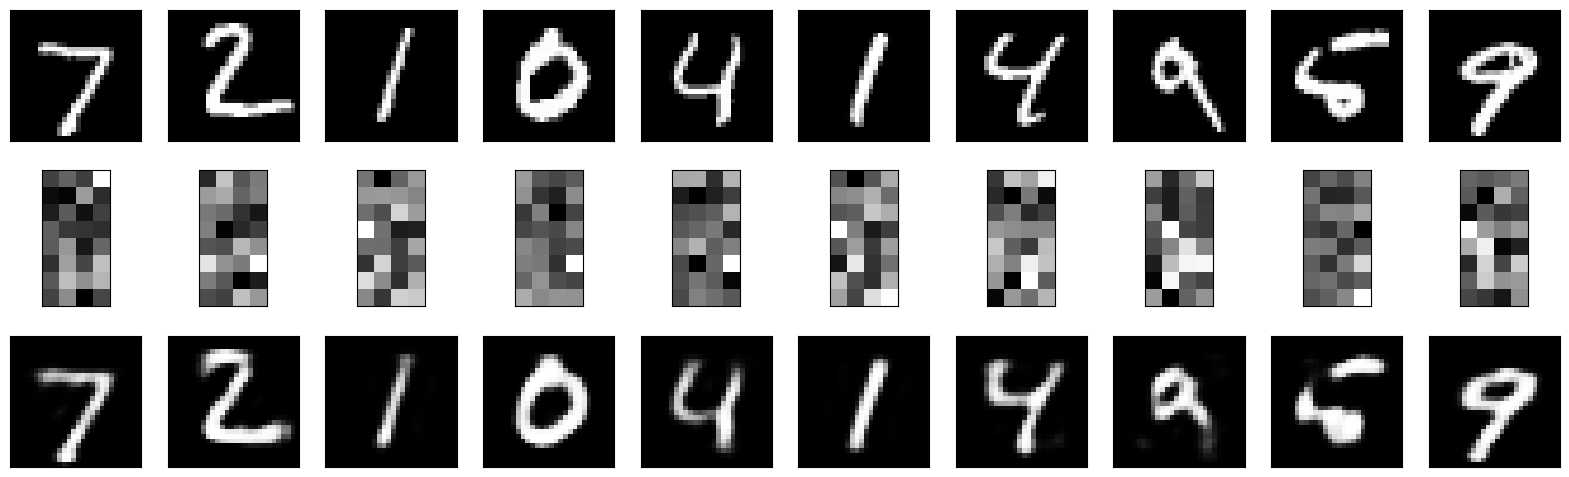

Model: "AutoEncoder_2Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3599 - val_loss: 0.1746
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1665 - val_loss: 0.1466
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1434 - val_loss: 0.1311
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1305 - val_loss: 0.1210
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1206 - val_loss: 0.1146
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1150 - val_loss: 0.1107
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1114 - val_loss: 0.1080
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1088 - val_loss: 0.1064
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1069 - val_loss: 0.1038
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1048 - val_loss: 0.1022
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1033 - val_loss: 0.1011
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

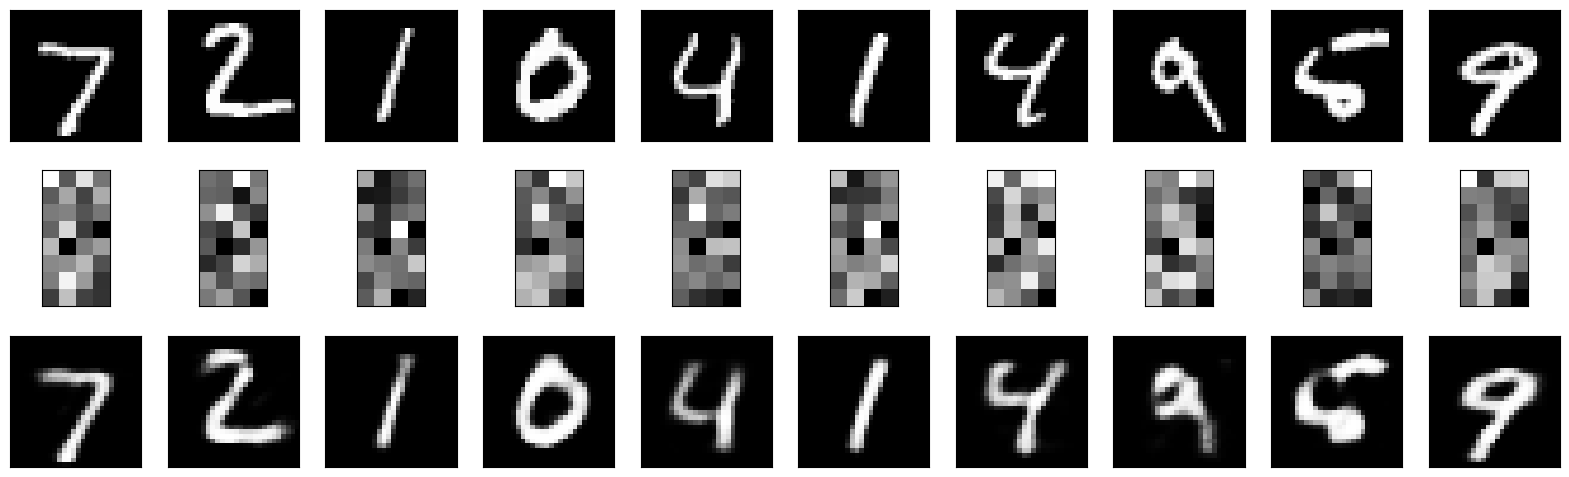

Model: "AutoEncoder_3Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3471 - val_loss: 0.1633
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1535 - val_loss: 0.1332
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1310 - val_loss: 0.1219
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1214 - val_loss: 0.1155
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1160 - val_loss: 0.1112
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1122 - val_loss: 0.1083
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1088 - val_loss: 0.1075
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1067 - val_loss: 0.1038
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1043 - val_loss: 0.1019
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1028 - val_loss: 0.1005
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1013 - val_loss: 0.0990
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

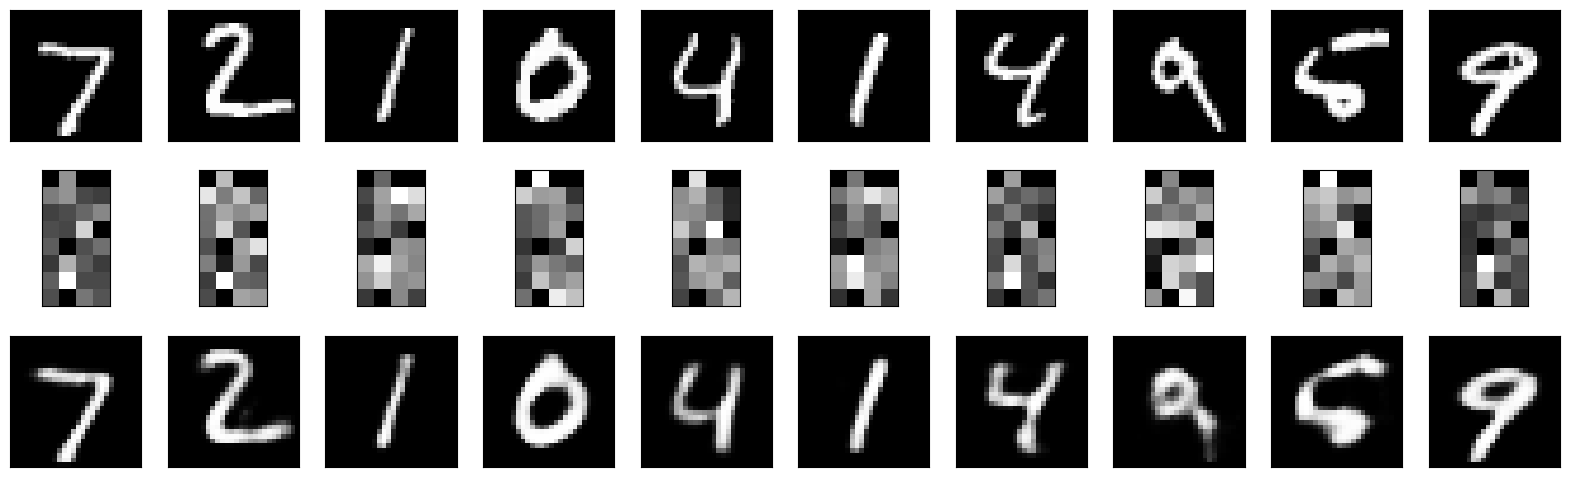

Model: "AutoEncoder_4Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489,136 (1.87 MB)

 Trainable params: 489,136 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3196 - val_loss: 0.1670
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1568 - val_loss: 0.1350
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1333 - val_loss: 0.1244
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1233 - val_loss: 0.1177
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1168 - val_loss: 0.1118
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1118 - val_loss: 0.1084
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1087 - val_loss: 0.1050
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1053 - val_loss: 0.1027
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1031 - val_loss: 0.1005
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1012 - val_loss: 0.0987
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0993 - val_loss: 0.0978
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

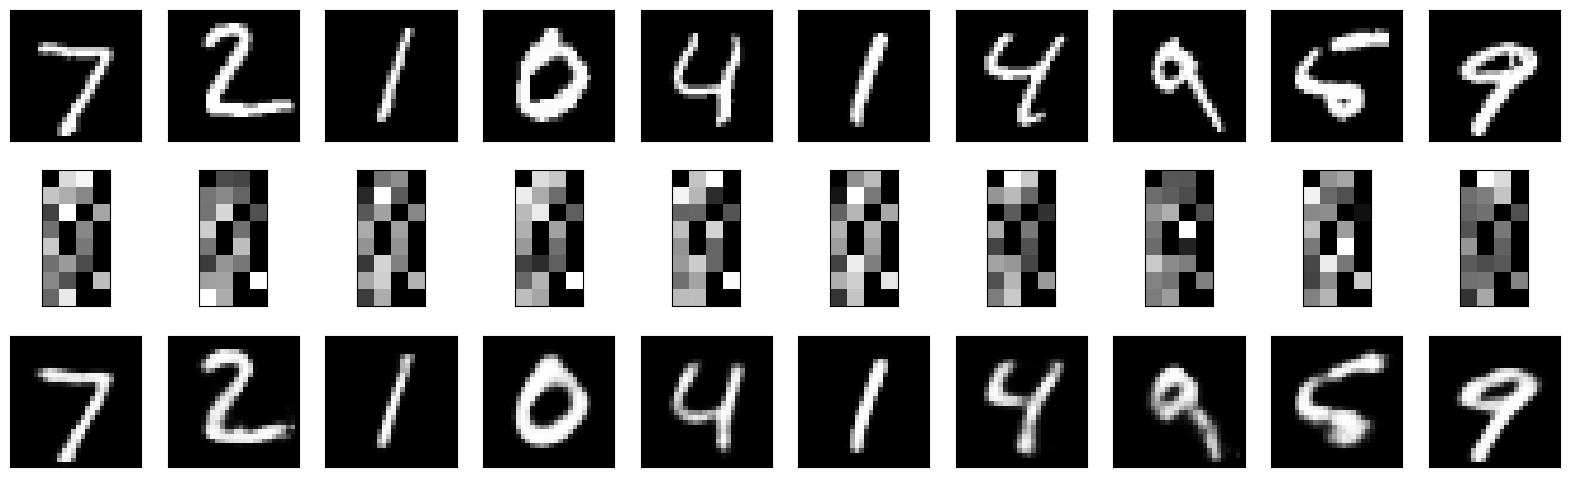

Model: "AutoEncoder_5Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153,712 (4.40 MB)

 Trainable params: 1,153,712 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3146 - val_loss: 0.1771
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1642 - val_loss: 0.1396
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1369 - val_loss: 0.1252
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1242 - val_loss: 0.1177
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1176 - val_loss: 0.1139
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1126 - val_loss: 0.1089
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1084 - val_loss: 0.1068
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1055 - val_loss: 0.1039
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1027 - val_loss: 0.1018
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1008 - val_loss: 0.1008
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0994 - val_loss: 0.0981
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

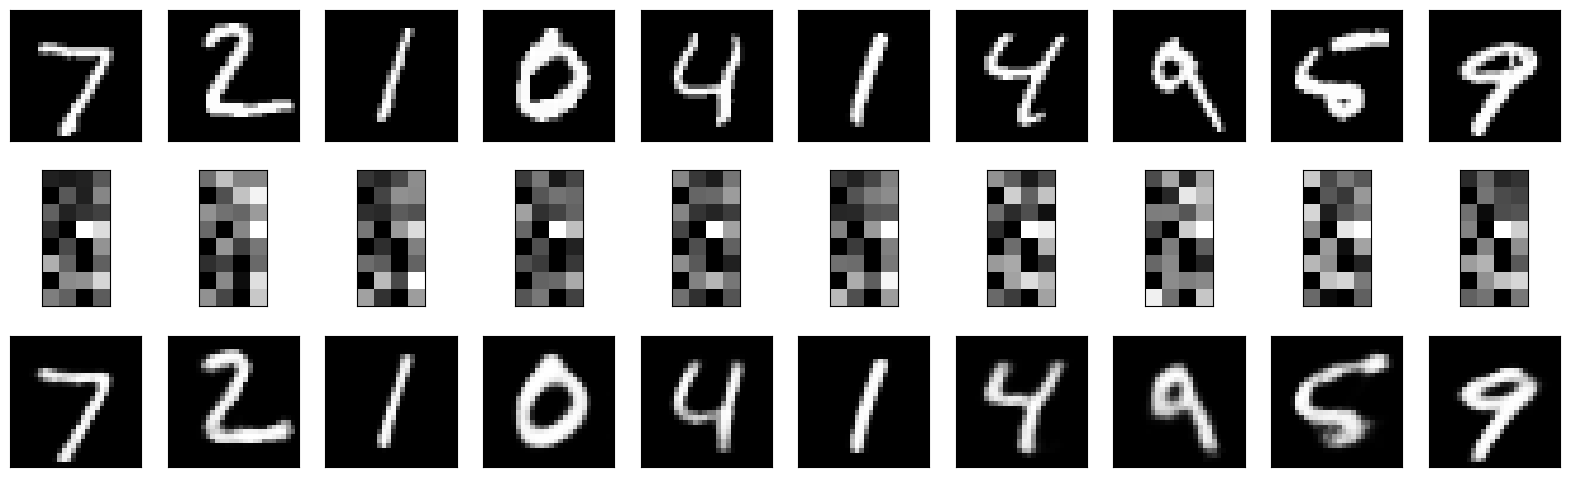

In [5]:

test_autoencoder(encoding_dim=32, dataset_type="mnist", n_layers=range(1, 6))


## CIFAR-10 Dataset

Train data shape: (50000, 1024)
Test data shape: (10000, 1024)

Compression factor: 16.0


Model: "AutoEncoder_1Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1024)           │        66,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,160 (516.25 KB)

 Trainable params: 132,160 (516.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6639 - val_loss: 0.6349
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6293 - val_loss: 0.6202
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6136 - val_loss: 0.6075
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6048 - val_loss: 0.6036
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6016 - val_loss: 0.6020
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6003 - val_loss: 0.6011
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5995 - val_loss: 0.6006
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5990 - val_loss: 0.5999
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5982 - val_loss: 0.5997
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5982 - val_loss: 0.5993
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5972 - val_loss: 0.5990
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

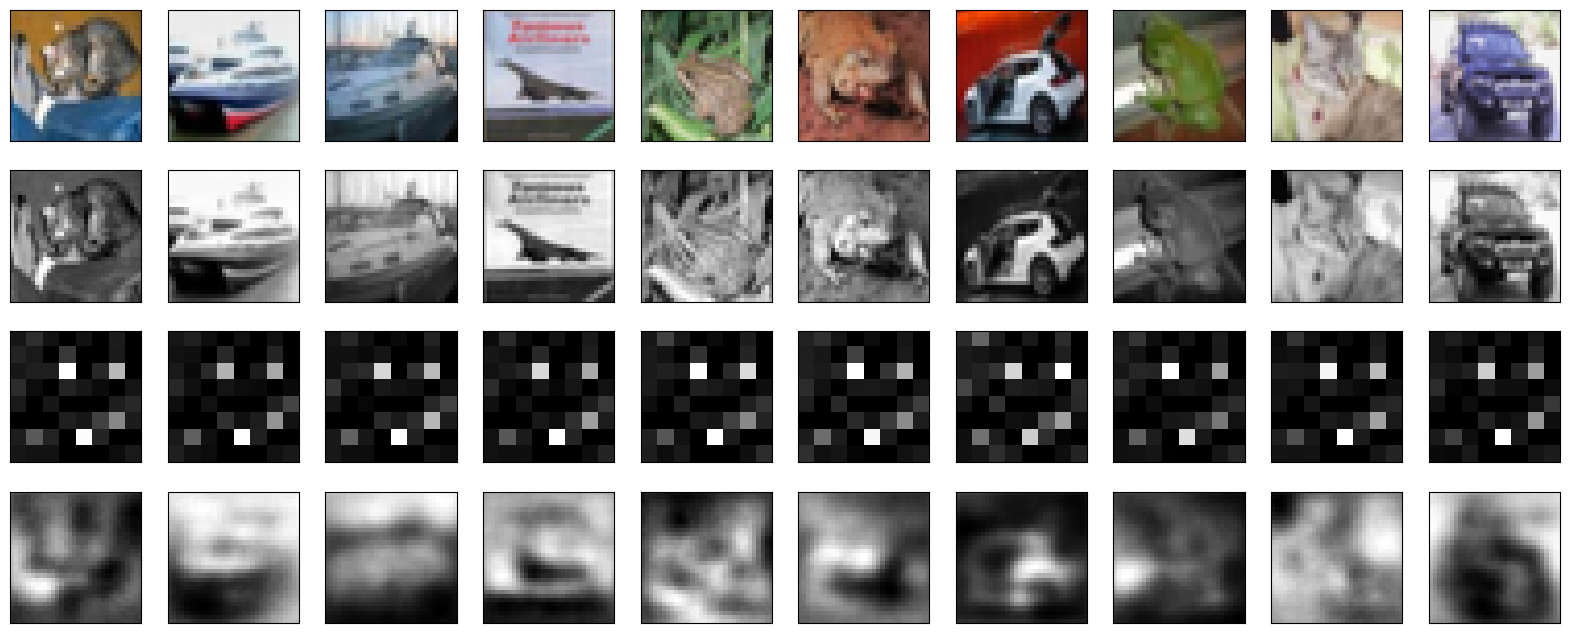

Model: "AutoEncoder_2Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1024)           │       132,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,872 (1.07 MB)

 Trainable params: 279,872 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6573 - val_loss: 0.6174
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6126 - val_loss: 0.6099
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6084 - val_loss: 0.6077
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6050 - val_loss: 0.6054
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6044 - val_loss: 0.6047
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6025 - val_loss: 0.6033
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6019 - val_loss: 0.6024
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6001 - val_loss: 0.6017
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6001 - val_loss: 0.6012
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5996 - val_loss: 0.6029
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5995 - val_loss: 0.6010
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

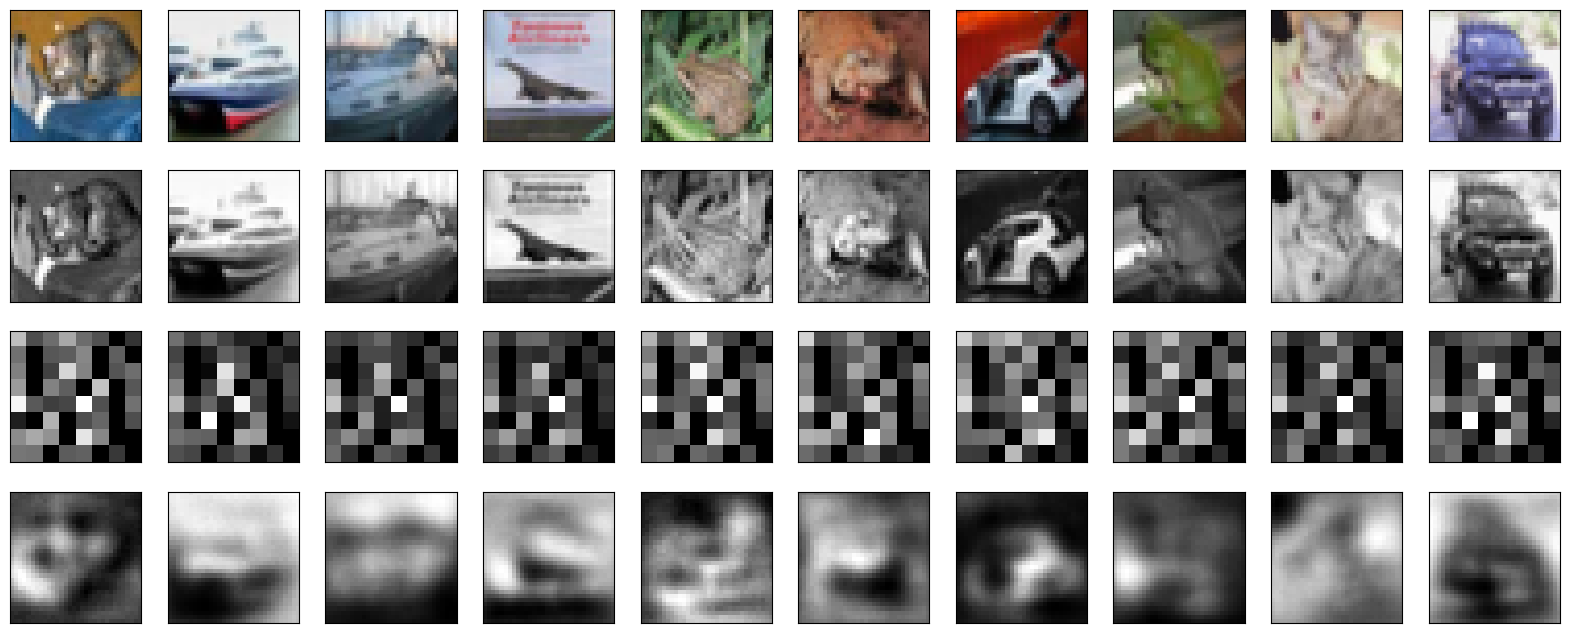

Model: "AutoEncoder_3Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1024)           │       263,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 608,064 (2.32 MB)

 Trainable params: 608,064 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.6550 - val_loss: 0.6200
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6163 - val_loss: 0.6121
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6097 - val_loss: 0.6105
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6066 - val_loss: 0.6071
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6050 - val_loss: 0.6058
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6043 - val_loss: 0.6045
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6030 - val_loss: 0.6039
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6012 - val_loss: 0.6027
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6009 - val_loss: 0.6019
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6001 - val_loss: 0.6020
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6001 - val_loss: 0.6011
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

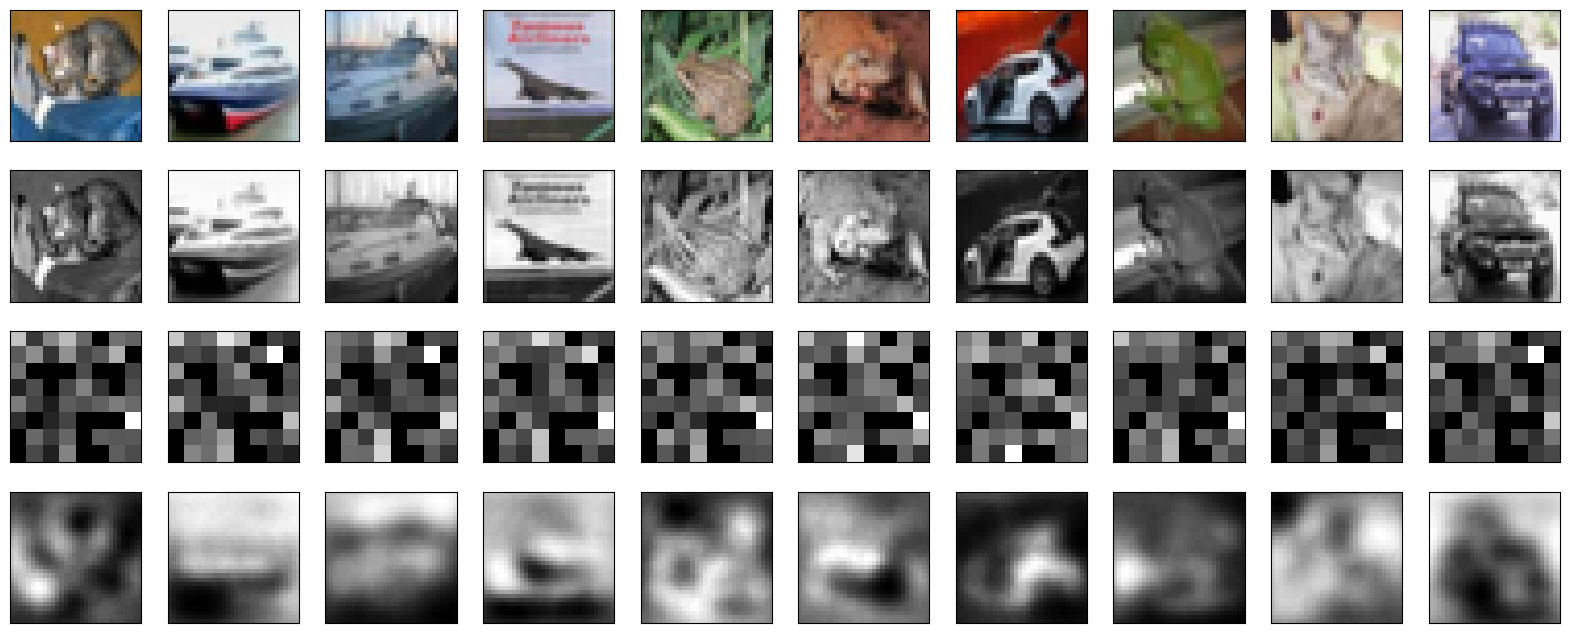

In [6]:

test_autoencoder(n_layers=range(1, 4), encoding_dim=64, dataset_type="cifar10")
